In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
def oracle(circuit, state):
    for ii, qubit in enumerate(state):
        if qubit == 0:
            circuit.x(qreg_q[len(state) - 1 - ii])
    circuit.h(qreg_q[2])
    circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
    circuit.h(qreg_q[2])
    for ii, qubit in enumerate(state):
        if qubit == 0:
            circuit.x(qreg_q[len(state) - 1 - ii])
    
    #circuit.x(qreg_q[0])
    #circuit.x(qreg_q[1])    
    circuit.barrier
    return circuit

In [3]:
def diffusion(circuit):
    qbit_list = [qreg_q[0], qreg_q[1], qreg_q[2]]
    # Apply Hadamard and X gates to the three qubits
    for qbit in qbit_list:
        circuit.h(qbit)
        circuit.x(qbit)
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
    circuit.h(qreg_q[2])
    circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
    circuit.h(qreg_q[2])
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
    # Apply X and Hadamard gates to the three qubits
    for qbit in qbit_list:
       circuit.x(qbit)
       circuit.h(qbit)
    return circuit

In [4]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
grover_circuit = QuantumCircuit(qreg_q, creg_c)
# Apply Hadamard to all the three qubits to
# create superposition
grover_circuit.h(qreg_q[0])
grover_circuit.h(qreg_q[1])
grover_circuit.h(qreg_q[2])

In [5]:
SEARCH = [0,1,0]

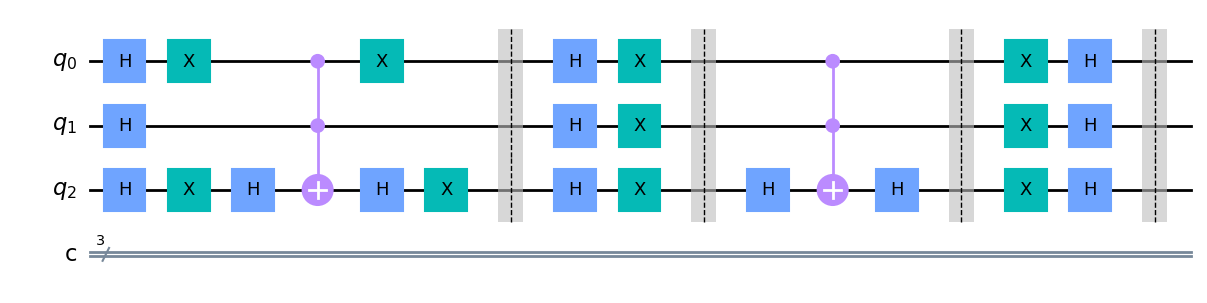

In [6]:
# Call the Oracle function with search state in variable 
# SEARCH
grover_circuit = oracle(grover_circuit, SEARCH)
grover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
# Apply diffusion function
grover_circuit = diffusion(grover_circuit)
# Add barriers for clarity
grover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
grover_circuit.draw('mpl')

In [7]:
sim = Aer.get_backend('aer_simulator')
# we need to mMake a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)

In [8]:
result = sim.run(qobj).result()
statevec = result.get_statevector()
from qiskit_textbook.tools import vector2latex
# Display the state vector
vector2latex(statevec, pretext="|\\psi\\rangle ="), statevec

<IPython.core.display.Math object>

(None,
 Statevector([-0.1767767+6.49467042e-17j, -0.1767767+6.49467042e-17j,
              -0.1767767+6.49467042e-17j, -0.1767767+6.49467042e-17j,
              -0.1767767+6.49467042e-17j, -0.1767767+6.49467042e-17j,
              -0.1767767+6.49467042e-17j, -0.1767767+6.49467042e-17j],
             dims=(2, 2, 2)))

In [9]:
# Measure the states of qubits 0, 1, and 2 in
# the Grover circuit and store the results in
# classical bits 0, 1, and 2
grover_circuit.measure([0,1,2],[0,1,2])
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj, shots=1000).result()

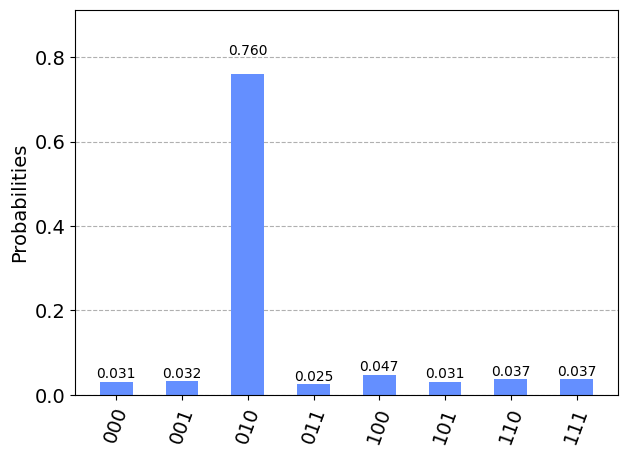

In [10]:
counts = result.get_counts()
plot_histogram(counts)